In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
import pandas as pd 
df=pd.read_excel('Task1and2/train.xlsx')

In [3]:
data=df.iloc[:, :-1]

In [4]:
features=data

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
from sklearn.neighbors import NearestNeighbors

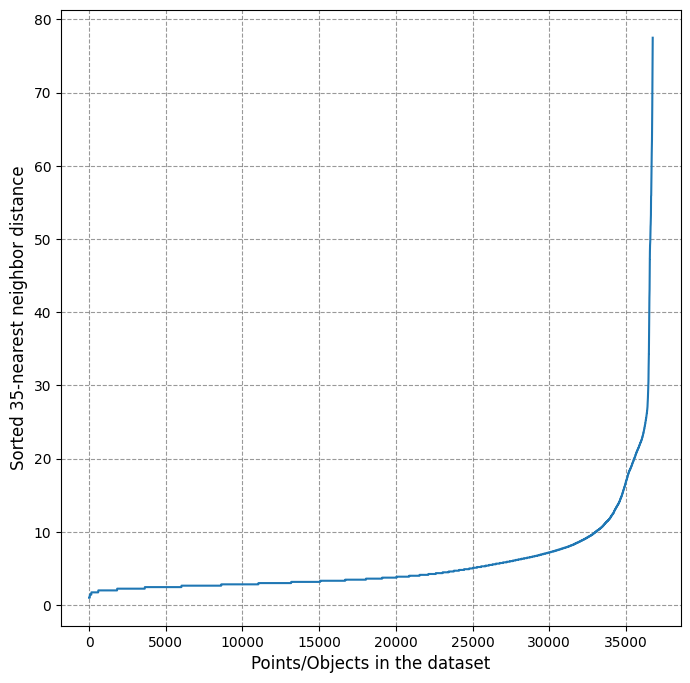

In [7]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * data.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=data, k=k)


In [8]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

dbscan = DBSCAN(eps=12, min_samples=4)
clusters = dbscan.fit_predict(reduced_features)

In [12]:
dbscan = DBSCAN(eps=12, min_samples=36)
clusters = dbscan.fit(scaled_features)

: 